In [1]:
import numpy as np
import pandas as pd
import itertools

data = []

sides = [i for i in [10,100,1000,10000]]
nws = [i for i in [1,5,10,25,50,100s,250,500]]
for s in itertools.product(sides,nws):
    row = [s[0],s[1]]
    suffix = f"_{s[0]}_{s[1]}.txt"
    with open(f"/Users/michelebersani/Desktop/Scuola/IVanno/Parallel/project/results/ff{suffix}") as ff:
        times = ff.readlines()
        times = np.array([int(t) for t in times])
        times = times*1e-6
        row.append(round(times.mean(), 4))
        row.append(round(times.std(), 4))
    with open(f"/Users/michelebersani/Desktop/Scuola/IVanno/Parallel/project/results/thread{suffix}") as ff:
        times = ff.readlines()
        times = np.array([int(t) for t in times])
        times = times*1e-6
        row.append(round(times.mean(), 4))
        row.append(round(times.std(), 4))
    data.append(row)

df = pd.DataFrame(data, columns=['side','workers','ff_mean','ff_std','thread_mean','thread_std'])
print(df.shape)

(24, 6)


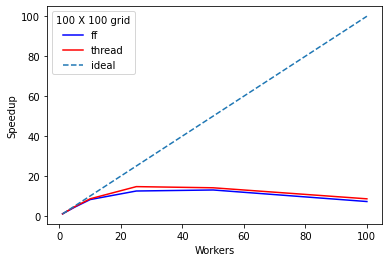

In [2]:
import matplotlib.pyplot as plt

small_df = df.loc[df['side'] == 1000]
seq_times = [59 * 10e-6, 0.584 * 10e-3, 0.600, 61.59] #seconds

seq_time = seq_times[-2]

plt.plot(small_df['workers'], seq_time/small_df['ff_mean'], 'b-', label='ff')
#plt.fill_between(small_df['workers'], seq_time/(small_df['ff_mean'] - small_df['ff_std']), seq_time/(small_df['ff_mean'] + small_df['ff_std']), color='b', alpha=0.2)
plt.plot(small_df['workers'], seq_time/small_df['thread_mean'], 'r-', label='thread')
#plt.fill_between(small_df['workers'], seq_time/(small_df['thread_mean'] - small_df['thread_std']), seq_time/(small_df['thread_mean'] + small_df['thread_std']), color='r', alpha=0.2)
plt.plot(small_df['workers'], small_df['workers'], '--', label='ideal')
plt.ylabel('Speedup')
plt.xlabel('Workers')

plt.legend(title='100 X 100 grid')
plt.show()